In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

from statsmodels.imputation.mice import MICE
import statsmodels.api as sm 
from statsmodels.imputation import mice

warnings.filterwarnings("ignore")

In [2]:
#set to unlimited colums display
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

df = pd.read_csv("test.csv")
print(df.shape)

(20000, 63)


# Data Types Classification

In [3]:
cat_features = ['province', 'district', 'maCv',
                'FIELD_7', 'FIELD_8', 'FIELD_9',
                'FIELD_10', 'FIELD_13', 'FIELD_17', 
                'FIELD_24', 'FIELD_35', 'FIELD_39', 
                'FIELD_41', 'FIELD_42', 'FIELD_43', 
                'FIELD_44']

bool_features = ['FIELD_2', 'FIELD_18', 'FIELD_19', 
                 'FIELD_20', 'FIELD_23', 'FIELD_25', 
                 'FIELD_26', 'FIELD_27', 'FIELD_28', 
                 'FIELD_29', 'FIELD_30', 'FIELD_31', 
                 'FIELD_36', 'FIELD_37', 'FIELD_38', 
                 'FIELD_47', 'FIELD_48', 'FIELD_49']

num_features = [col for col in df.columns if col not in cat_features+bool_features]

In [4]:
cat_data = df[cat_features]
cat_data.head()

,province,district,maCv,FIELD_7,FIELD_8,FIELD_9,FIELD_10,FIELD_13,FIELD_17,FIELD_24,FIELD_35,FIELD_39,FIELD_41,FIELD_42,FIELD_43,FIELD_44
0,NaN,NaN,NaN,[],NaN,na,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,[],NaN,na,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Thành phố Hà Nội,Huyện Mỹ Đức,Trưởng dây chuyền phòng sản xuất,"['DN', 'TE', 'DN']",MALE,DN,GH,YN,None,None,One,VN,I,Zezo,None,One
3,NaN,NaN,None,[],FEMALE,GD,T1,BI,None,None,Zero,VN,V,Zezo,None,One
4,NaN,NaN,NaN,[],NaN,na,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
boolean_data = df[bool_features]
boolean_data.head()

,FIELD_2,FIELD_18,FIELD_19,FIELD_20,FIELD_23,FIELD_25,FIELD_26,FIELD_27,FIELD_28,FIELD_29,FIELD_30,FIELD_31,FIELD_36,FIELD_37,FIELD_38,FIELD_47,FIELD_48,FIELD_49
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True
2,1.0,False,False,False,True,True,True,True,True,FALSE,FALSE,FALSE,FALSE,TRUE,False,False,True,False
3,1.0,False,False,False,True,True,True,True,True,FALSE,TRUE,FALSE,FALSE,TRUE,False,True,True,True
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True


In [6]:
num_data = df[num_features]
num_data.head()

,id,age_source1,age_source2,FIELD_1,FIELD_3,FIELD_4,FIELD_5,FIELD_6,FIELD_11,FIELD_12,FIELD_14,FIELD_15,FIELD_16,FIELD_21,FIELD_22,FIELD_32,FIELD_33,FIELD_34,FIELD_40,FIELD_45,FIELD_46,FIELD_50,FIELD_51,FIELD_52,FIELD_53,FIELD_54,FIELD_55,FIELD_56,FIELD_57
0,30000,NaN,NaN,1,719.0,0.0,0.0,0.0,NaN,NaN,1,1,NaN,NaN,NaN,1,1,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30001,NaN,NaN,1,1442.0,0.0,0.0,0.0,NaN,NaN,1,1,NaN,NaN,NaN,1,1,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30002,32.0,32.0,0,4000.0,2.0,3.0,0.0,12,0,0,0,1.0,1.0,133.0,0,1,0,None,1,1,29.77,66.428,30.955,31.171,0.0,0.31,0.0,0.0
3,30003,NaN,25.0,0,1073.0,0.0,0.0,0.0,12,0,0,0,1.0,1.0,12.0,0,0,0,1,1,0,29.77,21.478,30.955,31.171,0.0,0.05,0.0,0.0
4,30004,NaN,NaN,1,703.0,0.0,0.0,0.0,NaN,NaN,1,1,NaN,NaN,NaN,1,1,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
label = num_data.label
num_data = num_data.drop(["label"],axis=1)

AttributeError: 'DataFrame' object has no attribute 'label'

#  EDA n Cleaning

## Numerical Data

In [8]:
num_data.columns

Index(['id', 'age_source1', 'age_source2', 'FIELD_1', 'FIELD_3', 'FIELD_4',
       'FIELD_5', 'FIELD_6', 'FIELD_11', 'FIELD_12', 'FIELD_14', 'FIELD_15',
       'FIELD_16', 'FIELD_21', 'FIELD_22', 'FIELD_32', 'FIELD_33', 'FIELD_34',
       'FIELD_40', 'FIELD_45', 'FIELD_46', 'FIELD_50', 'FIELD_51', 'FIELD_52',
       'FIELD_53', 'FIELD_54', 'FIELD_55', 'FIELD_56', 'FIELD_57'],
      dtype='object')

In [9]:
corr = num_data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,id,age_source1,age_source2,FIELD_1,FIELD_3,FIELD_4,FIELD_5,FIELD_6,FIELD_14,FIELD_15,FIELD_16,FIELD_21,FIELD_22,FIELD_32,FIELD_33,FIELD_34,FIELD_46,FIELD_50,FIELD_51,FIELD_52,FIELD_53,FIELD_54,FIELD_55,FIELD_56,FIELD_57
id,1,0.016,0.0084,-0.0025,-0.0022,-0.011,0.0053,0.0041,-0.00057,0.00047,-0.014,-0.0051,0.0044,0.00041,0.0019,-0.0027,-0.0028,0.013,-0.0061,0.0038,0.0056,0.021,-0.0057,0.012,0.012
age_source1,0.016,1,0.95,0.21,0.19,0.076,-0.079,0.0073,0.11,0.11,0.014,-0.003,0.32,0.084,0.18,0.0094,-0.12,0.14,-0.2,0.039,0.029,0.17,-0.15,0.034,0.03
age_source2,0.0084,0.95,1,0.21,0.21,0.076,-0.056,0.0068,0.027,0.028,0.018,-0.0086,0.3,-0.0052,0.16,-0.066,-0.1,0.12,-0.2,0.0086,-0.0052,0.16,-0.16,0.0015,-0.0029
FIELD_1,-0.0025,0.21,0.21,1,-0.022,0.015,-0.062,-0.018,0.085,0.086,0.019,0.011,0.0031,0.071,0.066,0.088,-0.12,-0.037,-0.096,0.035,0.033,-0.057,-0.12,0.03,0.03
FIELD_3,-0.0022,0.19,0.21,-0.022,1,0.13,0.14,0.08,-0.23,-0.23,0.022,0.0055,0.3,-0.28,0.0062,-0.16,0.21,0.073,0.11,0.045,0.05,0.14,0.13,0.065,0.069
FIELD_4,-0.011,0.076,0.076,0.015,0.13,1,0.45,0.23,-0.29,-0.29,0.015,-0.008,0.11,-0.26,-0.11,-0.21,0.16,0.082,-0.042,-0.13,-0.12,0.077,-0.028,-0.11,-0.1
FIELD_5,0.0053,-0.079,-0.056,-0.062,0.14,0.45,1,0.24,-0.45,-0.45,0.036,-0.017,0.048,-0.4,-0.24,-0.3,0.24,0.019,0.054,-0.2,-0.19,0.0094,0.052,-0.17,-0.16
FIELD_6,0.0041,0.0073,0.0068,-0.018,0.08,0.23,0.24,1,-0.16,-0.16,0.011,-0.0068,0.022,-0.14,-0.07,-0.12,0.097,0.0085,-0.0069,-0.062,-0.058,0.0062,0.0061,-0.053,-0.051
FIELD_14,-0.00057,0.11,0.027,0.085,-0.23,-0.29,-0.45,-0.16,1,1,0.0055,0.067,-0.16,0.82,0.56,0.68,-0.49,-0.00061,-0.21,0.87,0.83,-0.011,-0.17,0.73,0.71
FIELD_15,0.00047,0.11,0.028,0.086,-0.23,-0.29,-0.45,-0.16,1,1,0.0062,0.068,-0.16,0.82,0.57,0.68,-0.49,-0.0049,-0.2,0.88,0.84,-0.012,-0.17,0.74,0.72


**Handling these columns which have high correlation -> avoid multicollinearity**
- age_source1 and age_source2
- FIELD_56 and FIELD_57
- FIELD_52 and FIELD_53

### Age source

In [10]:
# Take the mean between age_source1 and age_source2
temp = []
for i,j in zip(num_data["age_source1"],num_data["age_source2"]):
    if i is not None and j is not None:
        temp.append((i+j)/2)

In [11]:
num_data["age_source"] = num_data["age_source2"].combine_first(num_data["age_source1"])

In [12]:
num_data["age_source"].isnull().sum()/len(num_data["age_source"])*100 #percentage of missing values

27.439999999999998

In [13]:
for k,l in enumerate(temp):
    if (l >0 ) and (isinstance(l,float) == True) and k <10:
        num_data["age_source"][k] = l

In [14]:
num_data["age_source"].isnull().sum()/len(num_data["age_source"])*100 #percentage of missing values

27.439999999999998

In [15]:
num_data = num_data.drop(["age_source1","age_source2"], axis=1)

In [16]:
num_data["age_source"].describe()

count    14512.000000
mean        33.040174
std          9.099060
min         -1.000000
25%         26.000000
50%         31.000000
75%         39.000000
max         94.000000
Name: age_source, dtype: float64

In [17]:
(num_data["age_source"] < 18).value_counts()

False    19978
True        22
Name: age_source, dtype: int64

In [18]:
# df.loc[df['id'].isin(num_data[num_data["age_source"] < 18]['id'])] 

In [19]:
for i in num_data[num_data["age_source"] < 18]['id']:
    num_data["age_source"][i] = num_data.age_source.head()[0] #**

In [20]:
num_data["age_source"].describe()

count    14512.000000
mean        33.040174
std          9.099060
min         -1.000000
25%         26.000000
50%         31.000000
75%         39.000000
max         94.000000
Name: age_source, dtype: float64

In [21]:
num_data["age_source"].isnull().sum()/len(num_data["age_source"])*100 #percentage of missing values

27.519728298871243

### FIELD_56 n FIELD_57 

In [22]:
# Take the mean between FIELD_56 and FIELD_57
temp = []
for i,j in zip(num_data["FIELD_56"],num_data["FIELD_57"]):
    if i is not None and j is not None:
        temp.append((i+j)/2)
num_data["FIELD_567"] = num_data["FIELD_56"].combine_first(num_data["FIELD_57"])

In [23]:
num_data["FIELD_567"].isnull().sum()/len(num_data["FIELD_567"])*100 #percentage of missing values

32.519999999999996

In [24]:
for k,l in enumerate(temp):
    if (l >0 ) and (isinstance(l,float) == True) and k <10:
        num_data["FIELD_567"][k] = l

In [25]:
num_data["FIELD_567"].isnull().sum()/len(num_data["FIELD_567"])*100 #percentage of missing values

32.519999999999996

In [26]:
num_data = num_data.drop(["FIELD_56","FIELD_57"], axis=1)

In [27]:
num_data["FIELD_567"].describe()

count    13496.000000
mean         0.008477
std          0.033063
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: FIELD_567, dtype: float64

### FIELD_52 n FIELD_53

In [28]:
# Take the mean between FIELD_56 and FIELD_57
temp = []
for i,j in zip(num_data["FIELD_52"],num_data["FIELD_53"]):
    if i is not None and j is not None:
        temp.append((i+j)/2)
num_data["FIELD_523"] = num_data["FIELD_52"].combine_first(num_data["FIELD_53"])
print(num_data["FIELD_523"].isnull().sum()/len(num_data["FIELD_567"])*100) #percentage of missing values
for k,l in enumerate(temp):
    if (l >0 ) and (isinstance(l,float) == True) and k <10:
        num_data["FIELD_523"][k] = l
print(num_data["FIELD_523"].isnull().sum()/len(num_data["FIELD_523"])*100) #percentage of missing values
num_data = num_data.drop(["FIELD_52","FIELD_53"], axis=1)
num_data["FIELD_523"].describe()

32.519999999999996
32.519999999999996


count    13496.000000
mean        33.806971
std          9.406229
min         30.955000
25%         30.955000
50%         30.955000
75%         30.955000
max         67.636000
Name: FIELD_523, dtype: float64

(20000, 26)

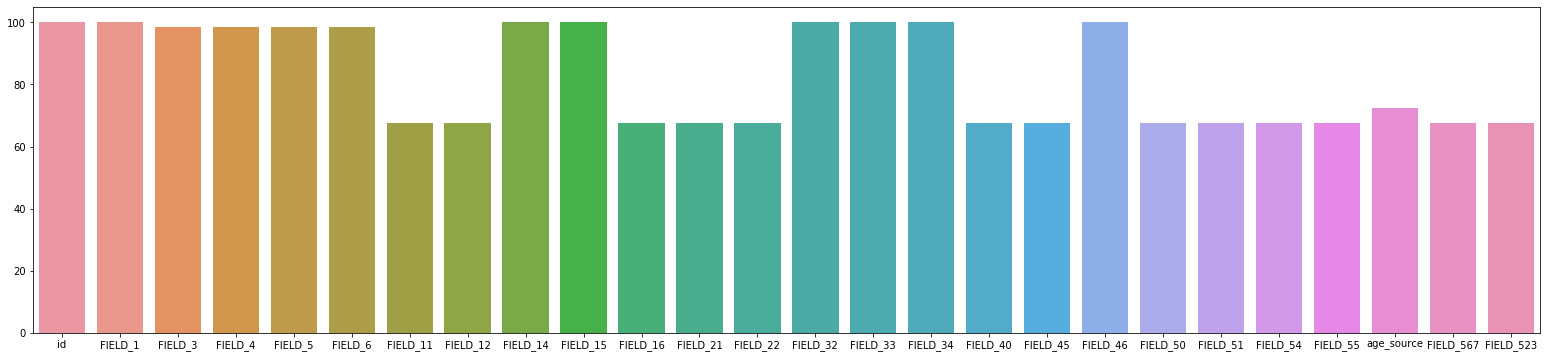

In [29]:
missing_df = num_data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variables','missing values']
missing_df['filling factor (%)'] = (num_data.shape[0]-missing_df['missing values'])/num_data.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop=True)
x=[]
y=[]
for i in missing_df.variables:
  x.append(i)
for j in missing_df['filling factor (%)']:
  y.append(j)
f,ax = plt.subplots(figsize=(27,6))
sns.barplot(x=x, y=y)
num_data.shape

### Remove ID

In [30]:
num_data = num_data.drop(['id'],axis=1)

In [31]:
num_data.dtypes

FIELD_1         int64
FIELD_3       float64
FIELD_4       float64
FIELD_5       float64
FIELD_6       float64
FIELD_11       object
FIELD_12       object
FIELD_14        int64
FIELD_15        int64
FIELD_16      float64
FIELD_21      float64
FIELD_22      float64
FIELD_32        int64
FIELD_33        int64
FIELD_34        int64
FIELD_40       object
FIELD_45       object
FIELD_46        int64
FIELD_50      float64
FIELD_51      float64
FIELD_54      float64
FIELD_55      float64
age_source    float64
FIELD_567     float64
FIELD_523     float64
dtype: object

### Mixed data

#### FIELD_11

In [32]:
import pandas
pandas.options.mode.use_inf_as_na = True

In [33]:
print(num_data["FIELD_11"].dtype,"||",num_data["FIELD_11"].unique())

object || [nan '12' '0' '4' '6' '3' '10' '36' '5' '11' '7' '24' '8' '9' '34' '13'
 '2' 'None' '15' '1' '14' '16' '23' '18' '60' '72' '43' '22' '37' '59'
 '21' '28' '33' '30' '27' '41' '25' '40' '45' '29' '57' '55' '54' '48'
 '31' '32' '69' '26' '68' '49' '35']


In [34]:
def convert_to_int(col):
    temp = []
    for i in col:
        try:
            if i.isnumeric() ==True:
                temp.append(int(i))
            else:
                temp.append(np.float64(np.nan))
        except AttributeError:
            temp.append(np.float64(np.nan))
    return temp
num_data["FIELD_11"] = convert_to_int(num_data["FIELD_11"])
print(num_data["FIELD_11"].dtype,"||",num_data["FIELD_11"].unique())

float64 || [nan 12.  0.  4.  6.  3. 10. 36.  5. 11.  7. 24.  8.  9. 34. 13.  2. 15.
  1. 14. 16. 23. 18. 60. 72. 43. 22. 37. 59. 21. 28. 33. 30. 27. 41. 25.
 40. 45. 29. 57. 55. 54. 48. 31. 32. 69. 26. 68. 49. 35.]


#### FIELD_12

In [35]:
num_data["FIELD_12"].dtype,"||",num_data["FIELD_12"].unique(),num_data["FIELD_12"].value_counts()

(dtype('O'),
 '||',
 array([nan, '0', 'None', '1', 'DK', 'GD', 'XK', 'DN', 'DT', 'HT'],
       dtype=object),
 0       11027
 None     2419
 1          43
 GD          2
 DK          1
 XK          1
 HT          1
 DN          1
 DT          1
 Name: FIELD_12, dtype: int64)

In [36]:
num_data["FIELD_12"] = num_data["FIELD_12"].replace("HT",'0')
num_data["FIELD_12"] = num_data["FIELD_12"].replace("TN",'1')

In [37]:
num_data["FIELD_12"].dtype,"||",num_data["FIELD_12"].unique(),num_data["FIELD_12"].value_counts()

(dtype('O'),
 '||',
 array([nan, '0', 'None', '1', 'DK', 'GD', 'XK', 'DN', 'DT'], dtype=object),
 0       11028
 None     2419
 1          43
 GD          2
 DK          1
 XK          1
 DN          1
 DT          1
 Name: FIELD_12, dtype: int64)

In [38]:
num_data["FIELD_12"] = convert_to_int(num_data["FIELD_12"])
print(num_data["FIELD_12"].dtype,"||",num_data["FIELD_12"].unique())

float64 || [nan  0.  1.]


#### FIELD_40

In [39]:
print(num_data["FIELD_40"].dtype,"\n\n",num_data["FIELD_40"].unique(),"\n\n",num_data["FIELD_40"].value_counts())

object 

 [nan 'None' '1' '6' '3' '02 05 08 11' '2'] 

 None           10073
1               3350
02 05 08 11       35
6                 18
3                 18
2                  2
Name: FIELD_40, dtype: int64


In [40]:
num_data["FIELD_40"] = num_data["FIELD_40"].replace("08 02",'999')
num_data["FIELD_40"] = num_data["FIELD_40"].replace("05 08 11 02",'999')
num_data["FIELD_40"] = num_data["FIELD_40"].replace("02 05 08 11",'999')

In [41]:
print(num_data["FIELD_40"].dtype,"\n\n",num_data["FIELD_40"].unique(),"\n\n",num_data["FIELD_40"].value_counts())

object 

 [nan 'None' '1' '6' '3' '999' '2'] 

 None    10073
1        3350
999        35
6          18
3          18
2           2
Name: FIELD_40, dtype: int64


In [42]:
num_data["FIELD_40"] = convert_to_int(num_data["FIELD_40"])
print(num_data["FIELD_40"].dtype,"\n\n",num_data["FIELD_40"].unique(),"\n\n",num_data["FIELD_40"].value_counts())

float64 

 [ nan   1.   6.   3. 999.   2.] 

 1.0      3350
999.0      35
3.0        18
6.0        18
2.0         2
Name: FIELD_40, dtype: int64


In [43]:
num_data["FIELD_40"] = num_data["FIELD_40"].replace(999,-1)
print(num_data["FIELD_40"].dtype,"\n\n",num_data["FIELD_40"].unique(),"\n\n",num_data["FIELD_40"].value_counts())

float64 

 [nan  1.  6.  3. -1.  2.] 

  1.0    3350
-1.0      35
 3.0      18
 6.0      18
 2.0       2
Name: FIELD_40, dtype: int64


#### FIELD_45

In [44]:
print(num_data["FIELD_45"].dtype,"||",num_data["FIELD_45"].unique(),num_data["FIELD_45"].value_counts())

object || [nan '1' '2' 'None' '3' 1.0 2.0 3.0] 1       8570
2       2453
1.0     1896
2.0      568
None       6
3.0        2
3          1
Name: FIELD_45, dtype: int64


In [45]:
num_data["FIELD_45"] = convert_to_int(num_data["FIELD_45"])
print(num_data["FIELD_45"].dtype,"||",num_data["FIELD_45"].unique())

float64 || [nan  1.  2.  3.]


In [46]:
num_data.columns

Index(['FIELD_1', 'FIELD_3', 'FIELD_4', 'FIELD_5', 'FIELD_6', 'FIELD_11',
       'FIELD_12', 'FIELD_14', 'FIELD_15', 'FIELD_16', 'FIELD_21', 'FIELD_22',
       'FIELD_32', 'FIELD_33', 'FIELD_34', 'FIELD_40', 'FIELD_45', 'FIELD_46',
       'FIELD_50', 'FIELD_51', 'FIELD_54', 'FIELD_55', 'age_source',
       'FIELD_567', 'FIELD_523'],
      dtype='object')

In [47]:
num_data[['FIELD_1','FIELD_12','FIELD_14','FIELD_15','FIELD_32','FIELD_33','FIELD_34','FIELD_45','FIELD_46']].dtypes

FIELD_1       int64
FIELD_12    float64
FIELD_14      int64
FIELD_15      int64
FIELD_32      int64
FIELD_33      int64
FIELD_34      int64
FIELD_45    float64
FIELD_46      int64
dtype: object

In [48]:
not_num_data = num_data[['FIELD_1','FIELD_12','FIELD_14','FIELD_15','FIELD_32','FIELD_33','FIELD_34','FIELD_45','FIELD_46','FIELD_21','FIELD_40']]                     
num_data = num_data.drop(['FIELD_1','FIELD_12','FIELD_14','FIELD_15','FIELD_32','FIELD_33','FIELD_34','FIELD_45','FIELD_46','FIELD_21','FIELD_40'],axis=1)

In [49]:
later_processed =  not_num_data[['FIELD_21','FIELD_40']]
not_num_data = not_num_data.drop(['FIELD_21','FIELD_40'],axis=1)

In [50]:
not_num_data.head()

,FIELD_1,FIELD_12,FIELD_14,FIELD_15,FIELD_32,FIELD_33,FIELD_34,FIELD_45,FIELD_46
0,1,NaN,1,1,1,1,1,NaN,0
1,1,NaN,1,1,1,1,1,NaN,0
2,0,0.0,0,0,0,1,0,1.0,1
3,0,0.0,0,0,0,0,0,1.0,0
4,1,NaN,1,1,1,1,1,NaN,0


In [51]:
not_num_data["FIELD_12"] = not_num_data["FIELD_12"].replace(0,False)
not_num_data["FIELD_12"] = not_num_data["FIELD_12"].replace(1,True)
not_num_data["FIELD_45"] = not_num_data["FIELD_45"].replace(1,False)
not_num_data["FIELD_45"] = not_num_data["FIELD_45"].replace(2,True)
not_num_data["FIELD_1"] = not_num_data["FIELD_1"].replace(0,False)
not_num_data["FIELD_1"] = not_num_data["FIELD_1"].replace(1,True)
not_num_data["FIELD_14"] = not_num_data["FIELD_14"].replace(0,False)
not_num_data["FIELD_14"] = not_num_data["FIELD_14"].replace(1,True)
not_num_data["FIELD_15"] = not_num_data["FIELD_15"].replace(0,False)
not_num_data["FIELD_15"] = not_num_data["FIELD_15"].replace(1,True)
not_num_data["FIELD_32"] = not_num_data["FIELD_32"].replace(0,False)
not_num_data["FIELD_32"] = not_num_data["FIELD_32"].replace(1,True)
not_num_data["FIELD_33"] = not_num_data["FIELD_33"].replace(0,False)
not_num_data["FIELD_33"] = not_num_data["FIELD_33"].replace(1,True)
not_num_data["FIELD_34"] = not_num_data["FIELD_34"].replace(0,False)
not_num_data["FIELD_34"] = not_num_data["FIELD_34"].replace(1,True)
not_num_data["FIELD_46"] = not_num_data["FIELD_46"].replace(0,False)
not_num_data["FIELD_46"] = not_num_data["FIELD_46"].replace(1,True)

In [52]:
boolean_data['FIELD_1'] = not_num_data['FIELD_1']
boolean_data['FIELD_12'] = not_num_data['FIELD_12']
boolean_data['FIELD_14'] = not_num_data['FIELD_14']
boolean_data['FIELD_15'] = not_num_data['FIELD_15']
boolean_data['FIELD_32'] = not_num_data['FIELD_32']
boolean_data['FIELD_33'] = not_num_data['FIELD_33']
boolean_data['FIELD_34'] = not_num_data['FIELD_34']
boolean_data['FIELD_45'] = not_num_data['FIELD_45']
boolean_data['FIELD_46'] = not_num_data['FIELD_46']

In [53]:
boolean_data.FIELD_2.value_counts()

1.0    14959
0.0     4716
Name: FIELD_2, dtype: int64

In [54]:
boolean_data["FIELD_2"] = boolean_data["FIELD_2"].replace(0,False)
boolean_data["FIELD_2"] = boolean_data["FIELD_2"].replace(1,True)

In [55]:
boolean_data.head()

,FIELD_2,FIELD_18,FIELD_19,FIELD_20,FIELD_23,FIELD_25,FIELD_26,FIELD_27,FIELD_28,FIELD_29,FIELD_30,FIELD_31,FIELD_36,FIELD_37,FIELD_38,FIELD_47,FIELD_48,FIELD_49,FIELD_1,FIELD_12,FIELD_14,FIELD_15,FIELD_32,FIELD_33,FIELD_34,FIELD_45,FIELD_46
0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,True,NaN,True,True,True,True,True,NaN,False
1,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,True,NaN,True,True,True,True,True,NaN,False
2,True,False,False,False,True,True,True,True,True,FALSE,FALSE,FALSE,FALSE,TRUE,False,False,True,False,False,False,False,False,False,True,False,False,True
3,True,False,False,False,True,True,True,True,True,FALSE,TRUE,FALSE,FALSE,TRUE,False,True,True,True,False,False,False,False,False,False,False,False,False
4,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,True,NaN,True,True,True,True,True,NaN,False


# Missing Data Imputation

### Boolean Data

In [56]:
# from autoimpute.imputations import MultipleImputer
# # mi = MultipleImputer() # imputation methods, passing through the data multiple times
# # create a complex instance of the MultipleImputer
# # Here, we specify strategies by column and predictors for each column
# # We also specify what additional arguments any `pmm` strategies should take
# imp = MultipleImputer(
# n=10,

# visit="left-to-right",
# return_list=True
# )
# # strategy={"salary": "pmm", "gender": "bayesian binary logistic", "age": "norm"},
# # predictors={"salary": "all", "gender": ["salary", "education", "weight"]},
# # imp_kwgs={"pmm": {"fill_value": "random"}},

# # Because we set return_list=True, imputations are done all at once, not evaluated ˓→lazily.
# # This will return M*N, where M is the number of imputations and N is the size of ˓→original dataframe.
# imp.fit_transform(boolean_data)

# # from autoimpute.analysis import MiLogisticRegression
# # imp_lm = MiLogisticRegression(imp)
# # imp_lm.fit(boolean_data)


In [57]:
isnull_features = boolean_data.isnull()

In [58]:
def boolean_missing_data_handler(col_array):
    for col in col_array:
        temp = []
        for value in boolean_data[str(col)]:
            if value == True:
                temp.append(1)
            elif value == False:
                temp.append(0)
            elif value == 'None':
                temp.append(-1)
            else:
                temp.append(-999)
        boolean_data[col] = temp
boolean_missing_data_handler(['FIELD_2', 'FIELD_18', 'FIELD_19', 'FIELD_20', 'FIELD_23', 'FIELD_25',
       'FIELD_26', 'FIELD_27', 'FIELD_28', 'FIELD_29', 'FIELD_30', 'FIELD_31',
       'FIELD_36', 'FIELD_37', 'FIELD_38', 'FIELD_47', 'FIELD_48', 'FIELD_49',
       'FIELD_1', 'FIELD_12', 'FIELD_14', 'FIELD_15', 'FIELD_32', 'FIELD_33',
       'FIELD_34', 'FIELD_45', 'FIELD_46'])

In [59]:
# boolean_data['FIELD_2_is_null'] = isnull_features['FIELD_2']
# boolean_data['FIELD_18_is_null'] = isnull_features['FIELD_18']
# boolean_data['FIELD_19_is_null'] = isnull_features['FIELD_19']
# boolean_data['FIELD_20_is_null'] = isnull_features['FIELD_20']
# boolean_data['FIELD_23_is_null'] = isnull_features['FIELD_23']
# boolean_data['FIELD_25_is_null'] = isnull_features['FIELD_25']
# boolean_data['FIELD_26_is_null'] = isnull_features['FIELD_26']
# boolean_data['FIELD_27_is_null'] = isnull_features['FIELD_27']
# boolean_data['FIELD_28_is_null'] = isnull_features['FIELD_28']
# boolean_data['FIELD_29_is_null'] = isnull_features['FIELD_29']
# boolean_data['FIELD_30_is_null'] = isnull_features['FIELD_30']
# boolean_data['FIELD_31_is_null'] = isnull_features['FIELD_31']
# boolean_data['FIELD_36_is_null'] = isnull_features['FIELD_36']
# boolean_data['FIELD_37_is_null'] = isnull_features['FIELD_37']
# boolean_data['FIELD_38_is_null'] = isnull_features['FIELD_38']
# boolean_data['FIELD_47_is_null'] = isnull_features['FIELD_47']
# boolean_data['FIELD_48_is_null'] = isnull_features['FIELD_48']
# boolean_data['FIELD_49_is_null'] = isnull_features['FIELD_49']


# boolean_data['FIELD_1_is_null'] = isnull_features['FIELD_1']
# boolean_data['FIELD_12_is_null'] = isnull_features['FIELD_12']
# boolean_data['FIELD_14_is_null'] = isnull_features['FIELD_14']
# boolean_data['FIELD_15_is_null'] = isnull_features['FIELD_15']
# boolean_data['FIELD_32_is_null'] = isnull_features['FIELD_32']
# boolean_data['FIELD_33_is_null'] = isnull_features['FIELD_33']
# boolean_data['FIELD_34_is_null'] = isnull_features['FIELD_34']
# boolean_data['FIELD_45_is_null'] = isnull_features['FIELD_45']
# boolean_data['FIELD_46_is_null'] = isnull_features['FIELD_46']

In [60]:
boolean_data.columns

Index(['FIELD_2', 'FIELD_18', 'FIELD_19', 'FIELD_20', 'FIELD_23', 'FIELD_25',
       'FIELD_26', 'FIELD_27', 'FIELD_28', 'FIELD_29', 'FIELD_30', 'FIELD_31',
       'FIELD_36', 'FIELD_37', 'FIELD_38', 'FIELD_47', 'FIELD_48', 'FIELD_49',
       'FIELD_1', 'FIELD_12', 'FIELD_14', 'FIELD_15', 'FIELD_32', 'FIELD_33',
       'FIELD_34', 'FIELD_45', 'FIELD_46'],
      dtype='object')

In [61]:
# boolean_missing_data_handler(['FIELD_2_is_null',
#        'FIELD_18_is_null', 'FIELD_19_is_null', 'FIELD_20_is_null',
#        'FIELD_23_is_null', 'FIELD_25_is_null', 'FIELD_26_is_null',
#        'FIELD_27_is_null', 'FIELD_28_is_null', 'FIELD_29_is_null',
#        'FIELD_30_is_null', 'FIELD_31_is_null', 'FIELD_36_is_null',
#        'FIELD_37_is_null', 'FIELD_38_is_null', 'FIELD_47_is_null',
#        'FIELD_48_is_null', 'FIELD_49_is_null', 'FIELD_1_is_null',
#        'FIELD_12_is_null', 'FIELD_14_is_null', 'FIELD_15_is_null',
#        'FIELD_32_is_null', 'FIELD_33_is_null', 'FIELD_34_is_null',
#        'FIELD_45_is_null', 'FIELD_46_is_null'])

In [62]:
boolean_data.isnull().sum()

FIELD_2     0
FIELD_18    0
FIELD_19    0
FIELD_20    0
FIELD_23    0
FIELD_25    0
FIELD_26    0
FIELD_27    0
FIELD_28    0
FIELD_29    0
FIELD_30    0
FIELD_31    0
FIELD_36    0
FIELD_37    0
FIELD_38    0
FIELD_47    0
FIELD_48    0
FIELD_49    0
FIELD_1     0
FIELD_12    0
FIELD_14    0
FIELD_15    0
FIELD_32    0
FIELD_33    0
FIELD_34    0
FIELD_45    0
FIELD_46    0
dtype: int64

In [63]:
boolean_data.head()

,FIELD_2,FIELD_18,FIELD_19,FIELD_20,FIELD_23,FIELD_25,FIELD_26,FIELD_27,FIELD_28,FIELD_29,FIELD_30,FIELD_31,FIELD_36,FIELD_37,FIELD_38,FIELD_47,FIELD_48,FIELD_49,FIELD_1,FIELD_12,FIELD_14,FIELD_15,FIELD_32,FIELD_33,FIELD_34,FIELD_45,FIELD_46
0,1,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1,1,1,1,-999,1,1,1,1,1,-999,0
1,1,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1,1,1,1,-999,1,1,1,1,1,-999,0
2,1,0,0,0,1,1,1,1,1,-999,-999,-999,-999,-999,0,0,1,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,1,1,1,1,1,-999,-999,-999,-999,-999,0,1,1,1,0,0,0,0,0,0,0,0,0
4,1,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1,1,1,1,-999,1,1,1,1,1,-999,0


### Num_data

In [64]:
num_data.shape

(20000, 14)

In [65]:
num_data.head()

,FIELD_3,FIELD_4,FIELD_5,FIELD_6,FIELD_11,FIELD_16,FIELD_22,FIELD_50,FIELD_51,FIELD_54,FIELD_55,age_source,FIELD_567,FIELD_523
0,719.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1442.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4000.0,2.0,3.0,0.0,12.0,1.0,133.0,29.77,66.428,0.0,0.31,32.0,0.0,31.063
3,1073.0,0.0,0.0,0.0,12.0,1.0,12.0,29.77,21.478,0.0,0.05,25.0,0.0,31.063
4,703.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
num_data.columns

Index(['FIELD_3', 'FIELD_4', 'FIELD_5', 'FIELD_6', 'FIELD_11', 'FIELD_16',
       'FIELD_22', 'FIELD_50', 'FIELD_51', 'FIELD_54', 'FIELD_55',
       'age_source', 'FIELD_567', 'FIELD_523'],
      dtype='object')

In [67]:
from fancyimpute uniquert KNN, NuclearNormMinimization, SoftImpute, BiScaler
# Use 3 nearest rows which have a feature to fill in each row's missing features
X_filled_knn = KNN(k=3).fit_transform(num_data)

Using TensorFlow backend.


Imputing row 1/20000 with 10 missing, elapsed time: 50.064
Imputing row 101/20000 with 10 missing, elapsed time: 50.090
Imputing row 201/20000 with 10 missing, elapsed time: 50.117
Imputing row 301/20000 with 0 missing, elapsed time: 50.144
Imputing row 401/20000 with 10 missing, elapsed time: 50.166
Imputing row 501/20000 with 0 missing, elapsed time: 50.190
Imputing row 601/20000 with 0 missing, elapsed time: 50.210
Imputing row 701/20000 with 0 missing, elapsed time: 50.226
Imputing row 801/20000 with 0 missing, elapsed time: 50.256
Imputing row 901/20000 with 10 missing, elapsed time: 50.278
Imputing row 1001/20000 with 0 missing, elapsed time: 50.309
Imputing row 1101/20000 with 0 missing, elapsed time: 50.331
Imputing row 1201/20000 with 0 missing, elapsed time: 50.355
Imputing row 1301/20000 with 0 missing, elapsed time: 50.379
Imputing row 1401/20000 with 0 missing, elapsed time: 50.403
Imputing row 1501/20000 with 0 missing, elapsed time: 50.422
Imputing row 1601/20000 with 10

In [119]:
len(cat_data)

20000

In [117]:
df_filled = pd.DataFrame(data=X_filled_knn,    # values
#                  index=X_filled_knn[1:,0],    # 1st column as index
                 columns=num_data.columns)  # 1st row as the column names
df_filled = df_filled.round(2)
print(df_filled.shape)

(20000, 14)


In [ ]:
# for k in range(num_data.shape[1]):
#     ii = np.flatnonzero(np.random.uniform(size=num_data.shape[0]) < 0.1)
#     num_data.iloc[ii, k] = np.nan

# imp_data = mice.MICEData(num_data)
# mi = mice.MICE('FIELD_3 ~ FIELD_4 + FIELD_5 + FIELD_6 + FIELD_11 + FIELD_16 + FIELD_22 + FIELD_50 + FIELD_51 + FIELD_54 + FIELD_55 + age_source + FIELD_567 + FIELD_523', sm.OLS, imp_data, n_skip=1)
# result = mi.fit(10, 10)

# print(result.summary())

In [90]:
num_data = df_filled

### Categorical Data

In [91]:
cat_data.head()

,province,district,maCv,FIELD_7,FIELD_8,FIELD_9,FIELD_10,FIELD_13,FIELD_17,FIELD_24,FIELD_35,FIELD_39,FIELD_41,FIELD_42,FIELD_43,FIELD_44
0,NaN,NaN,NaN,[],NaN,na,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,[],NaN,na,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Thành phố Hà Nội,Huyện Mỹ Đức,Trưởng dây chuyền phòng sản xuất,"['DN', 'TE', 'DN']",MALE,DN,GH,YN,None,None,One,VN,I,Zezo,None,One
3,NaN,NaN,None,[],FEMALE,GD,T1,BI,None,None,Zero,VN,V,Zezo,None,One
4,NaN,NaN,NaN,[],NaN,na,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
for i in cat_data.columns:
    cat_data[i] = cat_data[i].str.lower()

In [93]:
cat_data.head()

,province,district,maCv,FIELD_7,FIELD_8,FIELD_9,FIELD_10,FIELD_13,FIELD_17,FIELD_24,FIELD_35,FIELD_39,FIELD_41,FIELD_42,FIELD_43,FIELD_44
0,NaN,NaN,NaN,[],NaN,na,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,[],NaN,na,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,thành phố hà nội,huyện mỹ đức,trưởng dây chuyền phòng sản xuất,"['dn', 'te', 'dn']",male,dn,gh,yn,none,none,one,vn,i,zezo,none,one
3,NaN,NaN,none,[],female,gd,t1,bi,none,none,zero,vn,v,zezo,none,one
4,NaN,NaN,NaN,[],NaN,na,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
cat_data_isnull = cat_data.isnull()

In [95]:
def isnull_handler(col_array):
    for col in col_array:
        temp = []
        for value in cat_data_isnull[str(col)]:
            if value == True:
                temp.append(1)
            elif value == False:
                temp.append(0)
            elif value == 'None':
                temp.append(-1)
            else:
                temp.append(-999)
        cat_data_isnull[str(col)+"_isnull"] = temp
col_array = ['province', 'district', 'maCv', 'FIELD_7', 'FIELD_8', 'FIELD_9',
       'FIELD_10', 'FIELD_13', 'FIELD_17', 'FIELD_24', 'FIELD_35', 'FIELD_39',
       'FIELD_41', 'FIELD_42', 'FIELD_43', 'FIELD_44']
isnull_handler(col_array)

for col in col_array:
    cat_data_isnull = cat_data_isnull.drop([col],axis=1)

In [96]:
cat_data_isnull.head()

,province_isnull,district_isnull,maCv_isnull,FIELD_7_isnull,FIELD_8_isnull,FIELD_9_isnull,FIELD_10_isnull,FIELD_13_isnull,FIELD_17_isnull,FIELD_24_isnull,FIELD_35_isnull,FIELD_39_isnull,FIELD_41_isnull,FIELD_42_isnull,FIELD_43_isnull,FIELD_44_isnull
0,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1
1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1


#### FIELD_7

In [97]:
import ast
count_FIELD_7 = []
for i in cat_data['FIELD_7']:
    try:
        count_FIELD_7.append(len(ast.literal_eval(i)))
    except ValueError:
        count_FIELD_7.append(0)

In [98]:
temp = []
for value in cat_data['FIELD_7']:
    try:
        temp.append(sorted(ast.literal_eval(value)))
    except ValueError:
        temp.append([])
cat_data['FIELD_7'] = temp

In [99]:
# import ast
# dict_FIELD_7 = []
# for i in cat_data['FIELD_7']:
#     try:
#         for k in i:
#             if k not in dict_FIELD_7:
#                 dict_FIELD_7.append(k)
#             else:
#                 pass
#     except ValueError:
#         pass
# dict_FIELD_7

In [100]:
cat_data.head()

,province,district,maCv,FIELD_7,FIELD_8,FIELD_9,FIELD_10,FIELD_13,FIELD_17,FIELD_24,FIELD_35,FIELD_39,FIELD_41,FIELD_42,FIELD_43,FIELD_44
0,NaN,NaN,NaN,[],NaN,na,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,[],NaN,na,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,thành phố hà nội,huyện mỹ đức,trưởng dây chuyền phòng sản xuất,"[dn, dn, te]",male,dn,gh,yn,none,none,one,vn,i,zezo,none,one
3,NaN,NaN,none,[],female,gd,t1,bi,none,none,zero,vn,v,zezo,none,one
4,NaN,NaN,NaN,[],NaN,na,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
type(cat_data.province[0])

float

In [116]:
len(cat_data)

20000

In [115]:
def fill_nan(col_array):
    for col in col_array:
        temp = []
        for value in cat_data[str(col)]:
            try:
                if value == 'none':
                    temp.append('missing')
                elif isinstance(value,float) == True:
                    temp.append('missing')
                else:
                    temp.append(value)
            except ValueError:
                temp.append('missing')
        if len(temp) != 30000:
            print(len(temp),"failed")
            break
        cat_data[col] = temp
fill_nan(['province', 'district', 'maCv', 'FIELD_7', 'FIELD_8', 'FIELD_9',
       'FIELD_10', 'FIELD_13', 'FIELD_17', 'FIELD_24', 'FIELD_35', 'FIELD_39',
       'FIELD_41','FIELD_42','FIELD_43', 'FIELD_44'])

20000 failed


In [102]:
cat_data.head()

,province,district,maCv,FIELD_7,FIELD_8,FIELD_9,FIELD_10,FIELD_13,FIELD_17,FIELD_24,FIELD_35,FIELD_39,FIELD_41,FIELD_42,FIELD_43,FIELD_44
0,NaN,NaN,NaN,[],NaN,na,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,[],NaN,na,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,thành phố hà nội,huyện mỹ đức,trưởng dây chuyền phòng sản xuất,"[dn, dn, te]",male,dn,gh,yn,none,none,one,vn,i,zezo,none,one
3,NaN,NaN,none,[],female,gd,t1,bi,none,none,zero,vn,v,zezo,none,one
4,NaN,NaN,NaN,[],NaN,na,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
cat_data.isnull().sum()

province    8724
district    8733
maCv        6504
FIELD_7        0
FIELD_8     6504
FIELD_9        0
FIELD_10    6504
FIELD_13    6518
FIELD_17    6504
FIELD_24    6504
FIELD_35    6504
FIELD_39    6504
FIELD_41    6504
FIELD_42    6504
FIELD_43    6504
FIELD_44    6504
dtype: int64

In [104]:
later_processed.head()

,FIELD_21,FIELD_40
0,NaN,NaN
1,NaN,NaN
2,1.0,NaN
3,1.0,1.0
4,NaN,NaN


In [105]:
later_processed.FIELD_21[0]>0

False

In [106]:
def fill_nan_later_processed(col_array):
    for col in col_array:
        temp = []
        for value in later_processed[str(col)]:
            try:
                if value == 'none':
                    temp.append('-999')
                elif (isinstance(value,float) == True) and (value >0):
                    temp.append(value)
                else:
                    temp.append('-999')
            except ValueError:
                temp.append('-999')
        if len(temp) != 30000:
            print("failed")
            break
        later_processed[col] = temp
fill_nan_later_processed(['FIELD_21', 'FIELD_40'])

failed


In [107]:
later_processed.head()

,FIELD_21,FIELD_40
0,NaN,NaN
1,NaN,NaN
2,1.0,NaN
3,1.0,1.0
4,NaN,NaN


In [108]:
later_processed.isnull().sum()

FIELD_21     6504
FIELD_40    16577
dtype: int64

## Count Encoding

In [109]:
cat_data.head()

,province,district,maCv,FIELD_7,FIELD_8,FIELD_9,FIELD_10,FIELD_13,FIELD_17,FIELD_24,FIELD_35,FIELD_39,FIELD_41,FIELD_42,FIELD_43,FIELD_44
0,NaN,NaN,NaN,[],NaN,na,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,[],NaN,na,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,thành phố hà nội,huyện mỹ đức,trưởng dây chuyền phòng sản xuất,"[dn, dn, te]",male,dn,gh,yn,none,none,one,vn,i,zezo,none,one
3,NaN,NaN,none,[],female,gd,t1,bi,none,none,zero,vn,v,zezo,none,one
4,NaN,NaN,NaN,[],NaN,na,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
cat_data.FIELD_7 = cat_data.FIELD_7.astype(str)

In [112]:
cat_data.isnull().sum()

province    8724
district    8733
maCv        6504
FIELD_7        0
FIELD_8     6504
FIELD_9        0
FIELD_10    6504
FIELD_13    6518
FIELD_17    6504
FIELD_24    6504
FIELD_35    6504
FIELD_39    6504
FIELD_41    6504
FIELD_42    6504
FIELD_43    6504
FIELD_44    6504
dtype: int64

In [111]:
def count_encode(X, categorical_features, normalize=False):
    print('Count encoding: {}'.format(categorical_features))
    X_ = pd.DataFrame()
    for cat_feature in categorical_features:
        X_[cat_feature] = X[cat_feature].astype(
            'object').map(X[cat_feature].value_counts())
        if normalize:
            X_[cat_feature] = X_[cat_feature] / np.max(X_[cat_feature])
    X_ = X_.add_suffix('_count_encoded')
    if normalize:
        X_ = X_.astype(np.float32)
        X_ = X_.add_suffix('_normalized')
    else:
        X_ = X_.astype(np.uint32)
    return X_
for i in cat_data.columns:
    if len(cat_data[i].unique())>10:
        cat_data[i] = count_encode(cat_data, [i])

Count encoding: ['province']


ValueError: Cannot convert non-finite values (NA or inf) to integer

## OneHot Encoding

In [ ]:
cat_data.head()

In [ ]:
# d= cat_data
# cat_data = d
# cat_data.head()

In [ ]:
for i in cat_data.columns:
    if len(cat_data[i].unique())<=10:
        df_onehot = pd.get_dummies(cat_data[i])
        for k in range(0,df_onehot.shape[1]):
            cat_data[str(df_onehot.columns[k]) + "_onehot"] = df_onehot.iloc[ : , k]
        cat_data = cat_data.drop([i],axis=1)

In [ ]:
cat_data.head()

## Combine all the data

In [ ]:
num_data.shape

In [ ]:
def combine_dataframe(df):
    for i in range(0,df.shape[1]):
        cat_data[str(df.columns[i])] = df.iloc[ : , i]
    return "succeed!"
combine_dataframe(later_processed)

In [ ]:
# combine_dataframe(cat_data_isnull)
# cat_data.head()

In [ ]:
cat_data['count_FIELD_7'] = count_FIELD_7

In [ ]:
combine_dataframe(boolean_data)
cat_data.head()

In [ ]:
def combine_dataframe(df):
    for i in range(0,df.shape[1]):
        num_data[str(df.columns[i])] = df.iloc[ : , i]
    return "succeed!"
combine_dataframe(cat_data)

In [ ]:
df.shape

In [ ]:
num_data.shape

In [ ]:
data = num_data

# Cleaning n Scaling

In [ ]:
data.shape

In [ ]:
data.head()

In [ ]:
# data = data.drop(['FIELD_46_is_null','FIELD_34_is_null','FIELD_33_is_null','FIELD_32_is_null','FIELD_15_is_null','FIELD_14_is_null','FIELD_1_is_null','FIELD_49_is_null','FIELD_48_is_null','FIELD_47_is_null','FIELD_9_isnull'],axis=1)

In [ ]:
data.FIELD_18.unique()

In [ ]:
corr = data.corr()
cols = []
for col in corr.columns:
    if (( corr[col] > 0.95).value_counts()[1]) >1:
        cols.append(col)

In [ ]:
data = data.drop(['FIELD_38','FIELD_18','FIELD_19','FIELD_20','FIELD_23','FIELD_25','FIELD_26','FIELD_27','FIELD_28'],axis=1)

In [ ]:
data = data.drop(['district'],axis=1)

In [ ]:
data.shape

In [ ]:
data = data.sample(frac=1).reset_index(drop=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(data_scaled, label, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(data_scaled, label)
print(clf.feature_importances_)

In [ ]:
df_test = pd.read_csv("test.csv")
print(df_test.shape)

In [ ]:
df_test.isnull().sum()

In [ ]:
y_scores = clf.predict(X_test)

In [ ]:
len(y_scores)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_scores)

In [ ]:
2*roc_auc_score(y_test, y_scores) -1

In [ ]:
2*0.95-1

In [ ]:
ls

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression


def build_model_input():
    train_df = pd.read_csv('data/train.csv')
    test_df = pd.read_csv('data/test.csv')

    df = pd.concat([train_df, test_df])
    for col in df.columns:
        if df[col].dtype == 'object' and len(df[col].unique()) >= 10:
            df.drop(columns=[col], inplace=True)

    df.fillna(0, inplace=True)
    df = pd.get_dummies(df)

    y = df[df['id'] < 30000]['label']
    X = df[df['id'] < 30000].drop(columns=['label'])
    X_pred = df[df['id'] >= 30000]

    return X, X_pred, y


if __name__ == '__main__':
    X, X_pred, y = build_model_input()
    print(X.shape, X_pred.shape)

    clf = LogisticRegression()
    clf.fit(X, y)
   
    X_pred_id = X_pred['id']
    X_pred.drop(columns=['id'], inplace=True)

    y_pred = clf.predict_proba(X_pred.values)[:, 1]
    res_df = pd.DataFrame({'id': X_pred_id, 'label': y_pred})
    res_df.to_csv('simple_submission.csv', index=False)
